In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# my module to read dataset
import ReadFile as read

Using TensorFlow backend.


In [2]:
df=pd.read_csv("/Users/nagarajugooty/Downloads/Assignment 2/Diabetes.csv",header=0)

In [3]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
print(x.shape)
print(y.shape)
batchsize=100
epochs=500
lr=0.5
sgd=optimizers.SGD(lr)
adam=optimizers.Adam(lr)


(767, 8)
(767,)


In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=3)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((613, 8), (613,), (154, 8), (154,))

In [5]:
from keras.utils import np_utils
num_classes=8
ytrain=np_utils.to_categorical(ytrain,num_classes)
ytest=np_utils.to_categorical(ytest,num_classes)
ytrain.shape

(613, 8)

In [6]:
model=Sequential()
model.add(Dense(16,input_dim=8,activation='tanh',init='uniform'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='softmax'))

/Users/nagarajugooty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=8, activation="tanh", kernel_initializer="uniform")`
  


In [7]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
history=model.fit(xtrain,ytrain, epochs=epochs, batch_size=batchsize,verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [9]:
_, accuracy = model.evaluate(xtest, ytest)
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 371us/step
Accuracy: 67.53


In [12]:
results=model.predict(xtest)

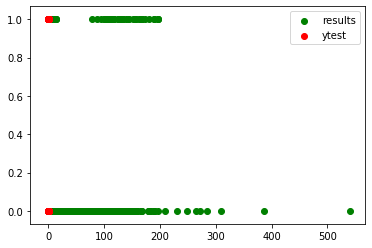

In [24]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest,c='g')
plt.scatter(results,ytest,c='r')
plt.legend(labels=['results','ytest'],loc='best')
plt.show()
